#### Credits and refrences: <br>
I have learned these techniques and implemented in this competitions from following kernels: <br>
1. [Disaster Tweets: Understanding Data & Basic model](https://www.kaggle.com/ratan123/disaster-tweets-understanding-data-basic-model#3.-Resampling-the-training-data) <br>

Thanks to authors of the above kernels :)

<a id='Target Visualization'></a>
# <font color='#3d3d5c'> Part one: Target Visualization</font> 
<br>

# 1. Importing necessary modules.
<br>

In [82]:
import os
import re
import warnings
from string import punctuation

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool

import numpy as np

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# import os

# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import TfidfVectorizer
# import nltk
# from nltk.tokenize import word_tokenize, sent_tokenize, TweetTokenizer
# from nltk.stem import WordNetLemmatizer, PorterStemmer
# from nltk.corpus import stopwords
# from string import punctuation

# import re

# import bokeh.plotting as bp
# from bokeh.models import HoverTool, BoxSelectTool
# from bokeh.models import ColumnDataSource
# from bokeh.plotting import figure, show, output_notebook, reset_output
# from bokeh.palettes import d3
# import bokeh.models as bmo
# from bokeh.io import save, output_file

# import warnings
# warnings.filterwarnings('ignore')


unable to import 'smart_open.gcs', disabling that module


## 1.1 warning

In [2]:
warnings.filterwarnings('ignore')

## 1.2 nltk

* When you download nltk data in project dirctory, it is necessary to add path 

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
nltk.data.path.append("/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/Real or Not NLP with Disaster Tweets/nltk_data")

## 1.3 matplolib

In [5]:
%matplotlib inline

## 1.4 pandas

* prevent chained_assignment

In [6]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

<hr>

# 2. Importing dataframes.
<br>

In [7]:
raw_train = pd.read_csv('./data/train.csv')
raw_test = pd.read_csv('./data/test.csv')

# train_df = pd.read_csv('./data/train.csv')
# test_df = pd.read_csv('./data/test.csv')

In [8]:
raw_train.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [9]:
raw_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<hr>

# 3. Resampling the training data.

In [10]:
train_disaster = raw_train[raw_train['target'] == 1]
train_non_disaster = raw_train[raw_train['target'] == 0]

length_disaster = len(train_disaster)
lengtH_non_disaster = len(train_non_disaster)

train_disaster = train_disaster.sample(length_disaster)
train_non_disaster = train_non_disaster.sample(lengtH_non_disaster)

train_eda = train_disaster.append(train_non_disaster).reset_index()

train_eda

index     id       keyword                  location  \
0      6730   9644  thunderstorm                       NaN   
1      3987   5664        floods                 Australia   
2      2186   3133        debris                     India   
3      4260   6053   heat%20wave         Pacific Northwest   
4      6253   8935     snowstorm       In the spirit world   
...     ...    ...           ...                       ...   
7608   5654   8066        rescue  Big NorthEast Litter Box   
7609   7000  10037       twister          Midwest City, OK   
7610   1054   1523   body%20bags              ANYWEHERE !!   
7611   4570   6497      injuries                       NaN   
7612    802   1164        blight                  Scotland   

                                                   text  target  
0     OUN continues Severe Thunderstorm Warning for ...       1  
1     In #India 119000 people have taken shelter in ...       1  
2     MH370: Aircraft debris found on La Reunion is ...       1  
3     UAE cool to Mideast heat-wave; rain watch late...       1  
4     Photo: mothernaturenetwork: What is thundersno...       1  
...                                                 ...     ...  
7608  I'm on 2 blood pressure meds and it's still pr...       0  
7609  HAPPY 24 TWISTER!!! Thank you for all the laug...       0  
7610                Status: last seen buying body bags.       0  
7611  I'm only experienced with injuries below the w...       0  
7612  LIKE I SWEAR THE SECRET WE'LL UNCOVER IS THE O...       0  

[7613 rows x 6 columns]

# 4. Text processing.

* Tokenization
* Stemming or Lemmatization

**before tokenization**

In [11]:
puncts=['☹', 'Ź', 'Ż', 'ἰ', 'ή', 'Š', '＞', 'ξ','ฉ', 'ั', 'น', 'จ', 'ะ', 'ท', 'ำ', 'ใ', 'ห', '้', 'ด', 'ี', '่', 'ส', 'ุ', 'Π', 'प', 'ऊ', 'Ö', 'خ', 'ب', 'ஜ', 'ோ', 'ட', '「', 'ẽ', '½', '△', 'É', 'ķ', 'ï', '¿', 'ł', '북', '한', '¼', '∆', '≥', '⇒', '¬', '∨', 'č', 'š', '∫', 'ḥ', 'ā', 'ī', 'Ñ', 'à', '▾', 'Ω', '＾', 'ý', 'µ', '?', '!', '.', ',', '"', '#', '$', '%', '\\', "'", '(', ')', '*', '+', '-', '/', ':', ';', '<', '=', '>', '@', '[', ']', '^', '_', '`', '{', '|', '}', '~', '“', '”', '’', 'é', 'á', '′', '…', 'ɾ', '̃', 'ɖ', 'ö', '–', '‘', 'ऋ', 'ॠ', 'ऌ', 'ॡ', 'ò', 'è', 'ù', 'â', 'ğ', 'म', 'ि', 'ल', 'ग', 'ई', 'क', 'े', 'ज', 'ो', 'ठ', 'ं', 'ड', 'Ž', 'ž', 'ó', '®', 'ê', 'ạ', 'ệ', '°', 'ص', 'و', 'ر', 'ü', '²', '₹', 'ú', '√', 'α', '→', 'ū', '—', '£', 'ä', '️', 'ø', '´', '×', 'í', 'ō', 'π', '÷', 'ʿ', '€', 'ñ', 'ç', 'へ', 'の', 'と', 'も', '↑', '∞', 'ʻ', '℅''ι', '•', 'ì', '−', 'л', 'я', 'д', 'ل', 'ك', 'م', 'ق', 'ا', '∈', '∩', '⊆', 'ã', 'अ', 'न', 'ु', 'स', '्', 'व', 'ा', 'र', 'त', '§', '℃', 'θ', '±', '≤', 'उ', 'द', 'य', 'ब', 'ट', '͡', '͜', 'ʖ', '⁴', '™', 'ć', 'ô', 'с', 'п', 'и', 'б', 'о', 'г', '≠', '∂', 'आ', 'ह', 'भ', 'ी', '³', 'च', '...', '⌚', '⟨', '⟩', '∖', '˂', 'ⁿ', '⅔', 'న', 'ీ', 'క', 'ె', 'ం', 'ద', 'ు', 'ా', 'గ', 'ర', 'ి', 'చ', 'র', 'ড়', 'ঢ়', 'સ', 'ં', 'ઘ', 'ર', 'ા', 'જ', '્', 'ય', 'ε', 'ν', 'τ', 'σ', 'ş', 'ś', 'س', 'ت', 'ط', 'ي', 'ع', 'ة', 'د', 'Å', '☺', 'ℇ', '❤', '♨', '✌', 'ﬁ', 'て', '„', 'Ā', 'ត', 'ើ', 'ប', 'ង', '្', 'អ', 'ូ', 'ន', 'ម', 'ា', 'ធ', 'យ', 'វ', 'ី', 'ខ', 'ល', 'ះ', 'ដ', 'រ', 'ក', 'ឃ', 'ញ', 'ឯ', 'ស', 'ំ', 'ព', 'ិ', 'ៃ', 'ទ', 'គ', '¢', 'つ', 'や', 'ค', 'ณ', 'ก', 'ล', 'ง', 'อ', 'ไ', 'ร', 'į', 'ی', 'ю', 'ʌ', 'ʊ', 'י', 'ה', 'ו', 'ד', 'ת', 'ᠠ', 'ᡳ', 'ᠰ', 'ᠨ', 'ᡤ', 'ᡠ', 'ᡵ', 'ṭ', 'ế', 'ध', 'ड़', 'ß', '¸', 'ч',  'ễ', 'ộ', 'फ', 'μ', '⧼', '⧽', 'ম', 'হ', 'া', 'ব', 'ি', 'শ', '্', 'প', 'ত', 'ন', 'য়', 'স', 'চ', 'ছ', 'ে', 'ষ', 'য', '়', 'ট', 'উ', 'থ', 'ক', 'ῥ', 'ζ', 'ὤ', 'Ü', 'Δ', '내', '제', 'ʃ', 'ɸ', 'ợ', 'ĺ', 'º', 'ष', '♭', '़', '✅', '✓', 'ě', '∘', '¨', '″', 'İ', '⃗', '̂', 'æ', 'ɔ', '∑', '¾', 'Я', 'х', 'О', 'з', 'ف', 'ن', 'ḵ', 'Č', 'П', 'ь', 'В', 'Φ', 'ỵ', 'ɦ', 'ʏ', 'ɨ', 'ɛ', 'ʀ', 'ċ', 'օ', 'ʍ', 'ռ', 'ք', 'ʋ', '兰', 'ϵ', 'δ', 'Ľ', 'ɒ', 'î', 'Ἀ', 'χ', 'ῆ', 'ύ', 'ኤ', 'ል', 'ሮ', 'ኢ', 'የ', 'ኝ', 'ን', 'አ', 'ሁ', '≅', 'ϕ', '‑', 'ả', '￼', 'ֿ', 'か', 'く', 'れ', 'ő', '－', 'ș', 'ן', 'Γ', '∪', 'φ', 'ψ', '⊨', 'β', '∠', 'Ó', '«', '»', 'Í', 'க', 'வ', 'ா', 'ம', '≈', '⁰', '⁷', 'ấ', 'ũ', '눈', '치', 'ụ', 'å', '،', '＝', '（', '）', 'ə', 'ਨ', 'ਾ', 'ਮ', 'ੁ', '︠', '︡', 'ɑ', 'ː', 'λ', '∧', '∀', 'Ō', 'ㅜ', 'Ο', 'ς', 'ο', 'η', 'Σ', 'ण']
odd_chars=[ '大','能', '化', '生', '水', '谷', '精', '微', 'ル', 'ー', 'ジ', 'ュ', '支', '那', '¹', 'マ', 'リ', '仲', '直', 'り', 'し', 'た', '主', '席', '血', '⅓', '漢', '髪', '金', '茶', '訓', '読', '黒', 'ř', 'あ', 'わ', 'る', '胡', '南', '수', '능', '广', '电', '总', 'ί', '서', '로', '가', '를', '행', '복', '하', '게', '기', '乡', '故', '爾', '汝', '言', '得', '理', '让', '骂', '野', '比', 'び', '太', '後', '宮', '甄', '嬛', '傳', '做', '莫', '你', '酱', '紫', '甲', '骨', '陳', '宗', '陈', '什', '么', '说', '伊', '藤', '長', 'ﷺ', '僕', 'だ', 'け', 'が', '街', '◦', '火', '团', '表',  '看', '他', '顺', '眼', '中', '華', '民', '國', '許', '自', '東', '儿', '臣', '惶', '恐', 'っ', '木', 'ホ', 'ج', '教', '官', '국', '고', '등', '학', '교', '는', '몇', '시', '간', '업', '니', '本', '語', '上', '手', 'で', 'ね', '台', '湾', '最', '美', '风', '景', 'Î', '≡', '皎', '滢', '杨', '∛', '簡', '訊', '短', '送', '發', 'お', '早', 'う', '朝', 'ش', 'ه', '饭', '乱', '吃', '话', '讲', '男', '女', '授', '受', '亲', '好', '心', '没', '报', '攻', '克', '禮', '儀', '統', '已', '經', '失', '存', '٨', '八', '‛', '字', '：', '别', '高', '兴', '还', '几', '个', '条', '件', '呢', '觀', '《', '》', '記', '宋', '楚', '瑜', '孫', '瀛', '枚', '无', '挑', '剔', '聖', '部', '頭', '合', '約', 'ρ', '油', '腻', '邋', '遢', 'ٌ', 'Ä', '射', '籍', '贯', '老', '常', '谈', '族', '伟', '复', '平', '天', '下', '悠', '堵', '阻', '愛', '过', '会', '俄', '罗', '斯', '茹', '西', '亚', '싱', '관', '없', '어', '나', '이', '키', '夢', '彩', '蛋', '鰹', '節', '狐', '狸', '鳳', '凰', '露', '王', '晓', '菲', '恋', 'に', '落', 'ち', 'ら', 'よ', '悲', '反', '清', '復', '明', '肉', '希', '望', '沒', '公', '病', '配', '信', '開', '始', '日', '商', '品', '発', '売', '分', '子', '创', '意', '梦', '工', '坊', 'ک', 'پ', 'ڤ', '蘭', '花', '羡', '慕', '和', '嫉', '妒', '是', '样', 'ご', 'め', 'な', 'さ', 'い', 'す', 'み', 'ま', 'せ', 'ん', '音', '红', '宝', '书', '封', '柏', '荣', '江', '青', '鸡', '汤', '文', '粵', '拼', '寧', '可', '錯', '殺', '千', '絕', '放', '過', '」', '之', '勢', '请', '国', '知', '识', '产', '权', '局', '標', '點', '符', '號', '新', '年', '快', '乐', '学', '业', '进', '步', '身', '体', '健', '康', '们', '读', '我', '的', '翻', '译', '篇', '章', '欢', '迎', '入', '坑', '有', '毒', '黎', '氏', '玉', '英', '啧', '您', '这', '口', '味', '奇', '特', '也', '就', '罢', '了', '非', '要', '以', '此', '为', '依', '据', '对', '人', '家', '批', '判', '一', '番', '不', '地', '道', '啊', '谢', '六', '佬']
specials = ["’", "‘", "´", "`"]
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have","didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",  "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have","that's": "that is", "there'd": "there would", "there'd've": "there would have","there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [12]:
def clean_numbers(text):
    text = re.sub(r'[0-9]{5, }', ' ##### ', text)
    text = re.sub(r'[0-9]{4}', ' #### ', text)
    text = re.sub(r'[0-9]{3}', ' ### ', text)
    text = re.sub(r'[0-9]{2}', ' ## ', text)
    return text

def clean_contractions(text):
    for s in specials:
        text = text.replace(s, "'")
    
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split()])
    return text

def add_space_punctuations(text):
    for p in puncts:
        text = text.replace(p, f' {p} ')
    return text

def add_space_odds(text):
    for o in odd_chars:
        text = text.replace(o, f' {o} ')
    return text

**after tokenization**

In [13]:
def remove_stopwords(words):
    stops = list(stopwords.words('english'))
    return [word for word in words if word not in stops]

def remove_punctuations(words):
    return [word for word in words if word not in punctuation]

def stem_words(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

In [14]:
train_eda

index     id       keyword                  location  \
0      6730   9644  thunderstorm                       NaN   
1      3987   5664        floods                 Australia   
2      2186   3133        debris                     India   
3      4260   6053   heat%20wave         Pacific Northwest   
4      6253   8935     snowstorm       In the spirit world   
...     ...    ...           ...                       ...   
7608   5654   8066        rescue  Big NorthEast Litter Box   
7609   7000  10037       twister          Midwest City, OK   
7610   1054   1523   body%20bags              ANYWEHERE !!   
7611   4570   6497      injuries                       NaN   
7612    802   1164        blight                  Scotland   

                                                   text  target  
0     OUN continues Severe Thunderstorm Warning for ...       1  
1     In #India 119000 people have taken shelter in ...       1  
2     MH370: Aircraft debris found on La Reunion is ...       1  
3     UAE cool to Mideast heat-wave; rain watch late...       1  
4     Photo: mothernaturenetwork: What is thundersno...       1  
...                                                 ...     ...  
7608  I'm on 2 blood pressure meds and it's still pr...       0  
7609  HAPPY 24 TWISTER!!! Thank you for all the laug...       0  
7610                Status: last seen buying body bags.       0  
7611  I'm only experienced with injuries below the w...       0  
7612  LIKE I SWEAR THE SECRET WE'LL UNCOVER IS THE O...       0  

[7613 rows x 6 columns]

In [15]:
train_eda['text'] = train_eda['text'].apply(lambda x: clean_numbers(x))
train_eda['text'] = train_eda['text'].apply(lambda x: clean_contractions(x))
train_eda['text'] = train_eda['text'].apply(lambda x: add_space_punctuations(x))
train_eda['text'] = train_eda['text'].apply(lambda x: add_space_odds(x))
train_eda

index     id       keyword                  location  \
0      6730   9644  thunderstorm                       NaN   
1      3987   5664        floods                 Australia   
2      2186   3133        debris                     India   
3      4260   6053   heat%20wave         Pacific Northwest   
4      6253   8935     snowstorm       In the spirit world   
...     ...    ...           ...                       ...   
7608   5654   8066        rescue  Big NorthEast Litter Box   
7609   7000  10037       twister          Midwest City, OK   
7610   1054   1523   body%20bags              ANYWEHERE !!   
7611   4570   6497      injuries                       NaN   
7612    802   1164        blight                  Scotland   

                                                   text  target  
0     OUN continues Severe Thunderstorm Warning for ...       1  
1     In  # India  #  #  #  #   #  #  people have ta...       1  
2     MH  #  #  #   :  Aircraft debris found on La R...       1  
3     UAE cool to Mideast heat - wave ;  rain watch ...       1  
4     Photo :  mothernaturenetwork :  What is thunde...       1  
...                                                 ...     ...  
7608  I am on 2 blood pressure meds and it is still ...       0  
7609  HAPPY  #  #  TWISTER !  !  !  Thank you for al...       0  
7610            Status :  last seen buying body bags .        0  
7611  I am only experienced with injuries below the ...       0  
7612  LIKE I SWEAR THE SECRET WE ' LL UNCOVER IS THE...       0  

[7613 rows x 6 columns]

In [16]:
train_eda['text'] = train_eda['text'].apply(lambda x: word_tokenize(x))
train_eda

index     id       keyword                  location  \
0      6730   9644  thunderstorm                       NaN   
1      3987   5664        floods                 Australia   
2      2186   3133        debris                     India   
3      4260   6053   heat%20wave         Pacific Northwest   
4      6253   8935     snowstorm       In the spirit world   
...     ...    ...           ...                       ...   
7608   5654   8066        rescue  Big NorthEast Litter Box   
7609   7000  10037       twister          Midwest City, OK   
7610   1054   1523   body%20bags              ANYWEHERE !!   
7611   4570   6497      injuries                       NaN   
7612    802   1164        blight                  Scotland   

                                                   text  target  
0     [OUN, continues, Severe, Thunderstorm, Warning...       1  
1     [In, #, India, #, #, #, #, #, #, people, have,...       1  
2     [MH, #, #, #, :, Aircraft, debris, found, on, ...       1  
3     [UAE, cool, to, Mideast, heat, -, wave, ;, rai...       1  
4     [Photo, :, mothernaturenetwork, :, What, is, t...       1  
...                                                 ...     ...  
7608  [I, am, on, 2, blood, pressure, meds, and, it,...       0  
7609  [HAPPY, #, #, TWISTER, !, !, !, Thank, you, fo...       0  
7610     [Status, :, last, seen, buying, body, bags, .]       0  
7611  [I, am, only, experienced, with, injuries, bel...       0  
7612  [LIKE, I, SWEAR, THE, SECRET, WE, ', LL, UNCOV...       0  

[7613 rows x 6 columns]

In [17]:
train_eda['text'] = train_eda['text'].apply(lambda x: remove_punctuations(x))
train_eda['text'] = train_eda['text'].apply(lambda x: remove_stopwords(x))
train_eda['text'] = train_eda['text'].apply(lambda x: lemmatize_words(x))
train_eda

index     id       keyword                  location  \
0      6730   9644  thunderstorm                       NaN   
1      3987   5664        floods                 Australia   
2      2186   3133        debris                     India   
3      4260   6053   heat%20wave         Pacific Northwest   
4      6253   8935     snowstorm       In the spirit world   
...     ...    ...           ...                       ...   
7608   5654   8066        rescue  Big NorthEast Litter Box   
7609   7000  10037       twister          Midwest City, OK   
7610   1054   1523   body%20bags              ANYWEHERE !!   
7611   4570   6497      injuries                       NaN   
7612    802   1164        blight                  Scotland   

                                                   text  target  
0     [OUN, continues, Severe, Thunderstorm, Warning...       1  
1     [In, India, people, taken, shelter, relief, ca...       1  
2     [MH, Aircraft, debris, found, La, Reunion, mis...       1  
3     [UAE, cool, Mideast, heat, wave, rain, watch, ...       1  
4     [Photo, mothernaturenetwork, What, thundersnow...       1  
...                                                 ...     ...  
7608  [I, 2, blood, pressure, med, still, probably, ...       0  
7609  [HAPPY, TWISTER, Thank, laugh, sticking, side,...       0  
7610            [Status, last, seen, buying, body, bag]       0  
7611                    [I, experienced, injury, waist]       0  
7612  [LIKE, I, SWEAR, THE, SECRET, WE, LL, UNCOVER,...       0  

[7613 rows x 6 columns]

# 5. T-SNE applied to Latent Semantic (LSA) space

In [36]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=5)
tfidf = vectorizer.fit_transform(list(train_eda['text'].apply(lambda x: ' '.join(x))))

In [37]:
vectorizer.get_feature_names()

['1st',
 '2nd',
 '3g',
 '3g whole',
 '3g whole time',
 '4wd',
 '4x4',
 '4x4 offroad',
 '4x4 offroad fog',
 '5km',
 '5km volcano',
 '5km volcano hawaii',
 '5th',
 'aba',
 'aba as',
 'aba as woman',
 'abandoned',
 'abandoned aircraft',
 'abandoned aircraft mma',
 'abc',
 'abc news',
 'abc news http',
 'abcnews',
 'ablaze',
 'ablaze http',
 'ablaze http co',
 'able',
 'about',
 'about trapped',
 'about trapped miners',
 'absolutely',
 'abstorm',
 'abuse',
 'access',
 'access to',
 'access to the',
 'accident',
 'accident expert',
 'accident http',
 'accident http co',
 'accident man',
 'accident man died',
 'accident property',
 'accident property damage',
 'accident the',
 'accident the indian',
 'accidentally',
 'according',
 'account',
 'acre',
 'across',
 'act',
 'action',
 'activated',
 'active',
 'activity',
 'actual',
 'actually',
 'add',
 'added',
 'added video',
 'added video youtube',
 'address',
 'admits',
 'admits arson',
 'admits arson scheme',
 'adult',
 'advance',
 'advisor

In [38]:
tfidf.shape

(7613, 4809)

In [39]:
pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

1st  2nd   3g  3g whole  3g whole time  4wd  4x4  4x4 offroad  \
0     0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
1     0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
2     0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
3     0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
4     0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
...   ...  ...  ...       ...            ...  ...  ...          ...   
7608  0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
7609  0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
7610  0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
7611  0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   
7612  0.0  0.0  0.0       0.0            0.0  0.0  0.0          0.0   

      4x4 offroad fog  5km  5km volcano  5km volcano hawaii  5th  aba  aba as  \
0                 0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
1                 0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
2                 0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
3                 0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
4                 0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
...               ...  ...          ...                 ...  ...  ...     ...   
7608              0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
7609              0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
7610              0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
7611              0.0  0.0          0.0                 0.0  0.0  0.0     0.0   
7612              0.0  0.0          0.0                 0.0  0.0  0.0     0.0   

      aba as woman  abandoned  abandoned aircraft  abandoned aircraft mma  \
0              0.0        0.0                 0.0                     0.0   
1              0.0        0.0                 0.0                     0.0   
2              0.0        0.0                 0.0                     0.0   
3              0.0        0.0                 0.0                     0.0   
4              0.0        0.0                 0.0                     0.0   
...            ...        ...                 ...                     ...   
7608           0.0        0.0                 0.0                     0.0   
7609           0.0        0.0                 0.0                     0.0   
7610           0.0        0.0                 0.0                     0.0   
7611           0.0        0.0                 0.0                     0.0   
7612           0.0        0.0                 0.0                     0.0   

           abc  abc news  abc news http  abcnews  ablaze  ablaze http  \
0     0.000000       0.0            0.0      0.0     0.0          0.0   
1     0.000000       0.0            0.0      0.0     0.0          0.0   
2     0.184008       0.0            0.0      0.0     0.0          0.0   
3     0.000000       0.0            0.0      0.0     0.0          0.0   
4     0.000000       0.0            0.0      0.0     0.0          0.0   
...        ...       ...            ...      ...     ...          ...   
7608  0.000000       0.0            0.0      0.0     0.0          0.0   
7609  0.000000       0.0            0.0      0.0     0.0          0.0   
7610  0.000000       0.0            0.0      0.0     0.0          0.0   
7611  0.000000       0.0            0.0      0.0     0.0          0.0   
7612  0.000000       0.0            0.0      0.0     0.0          0.0   

      ablaze http co  able  about  about trapped  about trapped miners  \
0                0.0   0.0    0.0            0.0                   0.0   
1                0.0   0.0    0.0            0.0                   0.0   
2                0.0   0.0    0.0            0.0                   0.0   
3                0.0   0.0    0.0            0.0                   0.0   
4       

# 6. Scatter plots of the Latent Semantic Space

## 6.1 First 3 dimentions of the Latent Semantic Space

In [44]:
svd = TruncatedSVD(n_components=50, random_state=2020)
tfidf_svd = svd.fit_transform(tfidf)
print('Dimensionality of LSA space: {}'.format(tfidf_svd.shape))

Dimensionality of LSA space: (7613, 50)


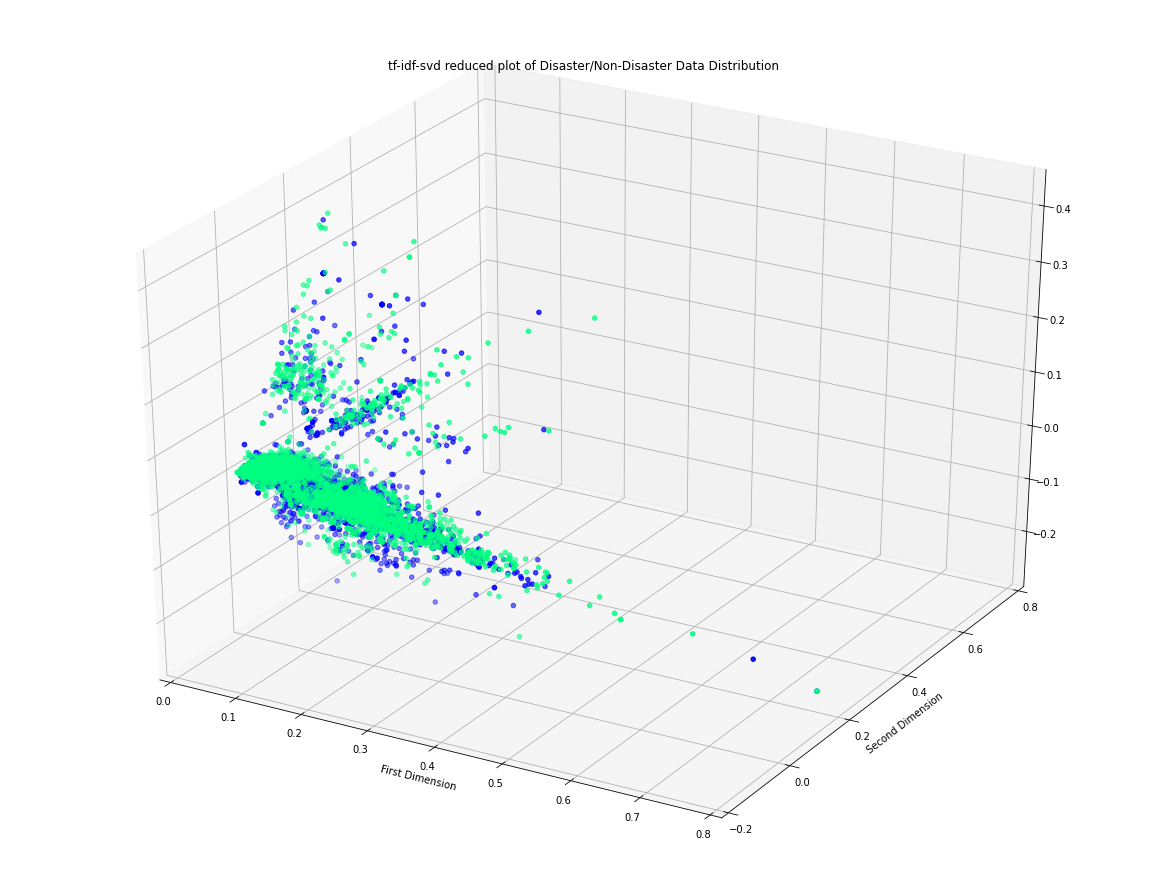

In [50]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig)

ax.scatter3D(
    tfidf_svd[:, 0],
    tfidf_svd[:, 1],
    tfidf_svd[:, 2],
    c=train_eda['target'],
    marker='o',
    cmap=plt.cm.winter_r
)

plt.title('tf-idf-svd reduced plot of Disaster/Non-Disaster Data Distribution')
plt.xlim((0, 0.8))
plt.ylim((-0.2, 0.8))
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.show()

## 6.2 Random 3 dimensions of the Latent Semantic Space

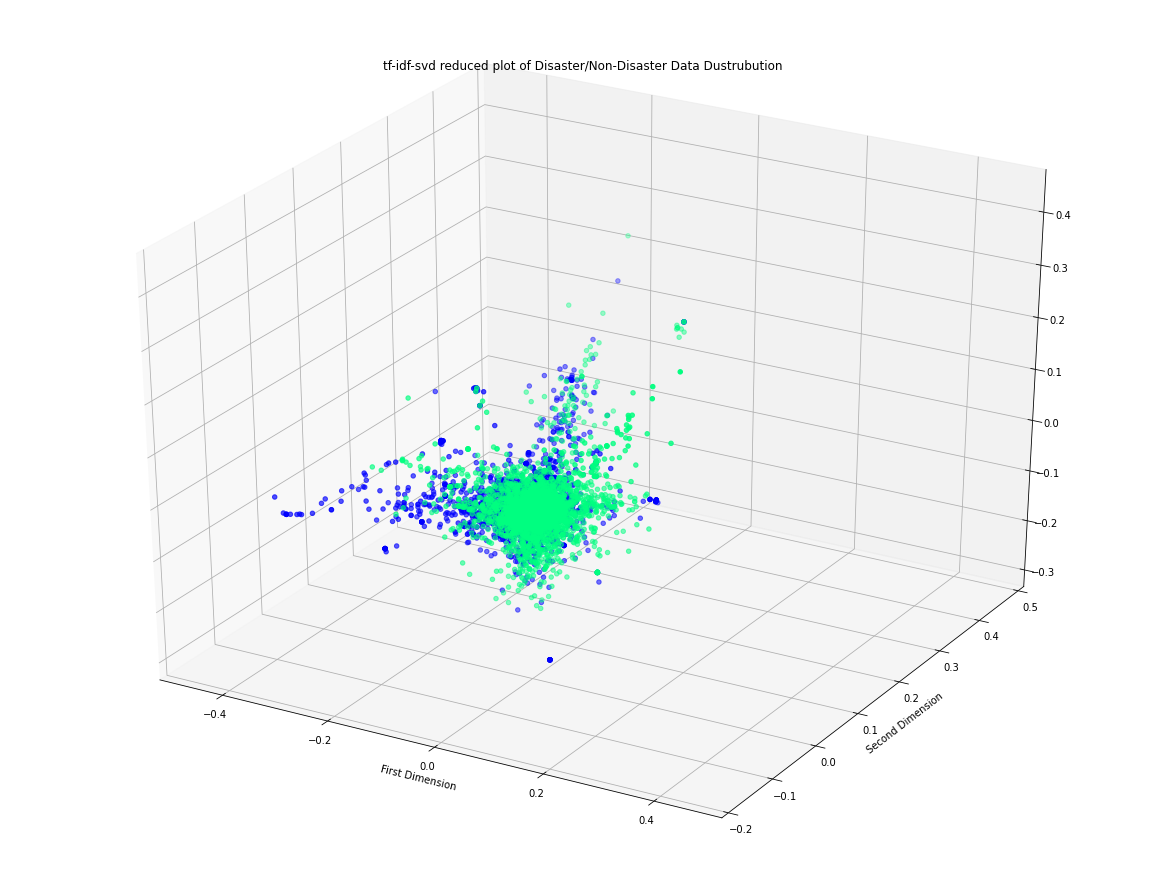

In [58]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig)
ax.scatter3D(
    tfidf_svd[:, 24],
    tfidf_svd[:, 25],
    tfidf_svd[:, 26],
    c=train_eda['target'],
    marker='o',
    cmap=plt.cm.winter_r
)

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('tf-idf-svd reduced plot of Disaster/Non-Disaster Data Dustrubution')
plt.xlim((-0.5, 0.5))
plt.ylim((-0.2, 0.5))
plt.show()

## 6.3 Last 3 dimensions of the Lattent Semantic Space

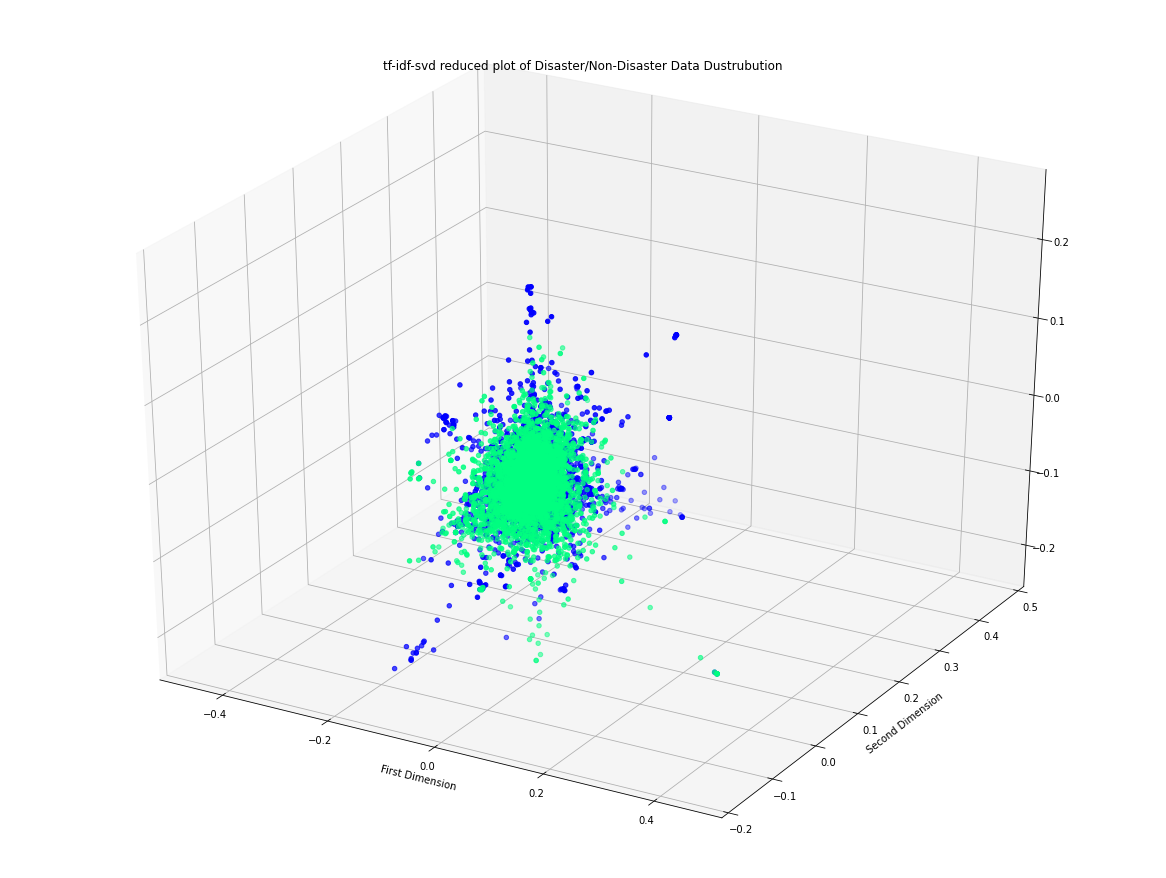

In [59]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig)
ax.scatter3D(
    tfidf_svd[:, -3],
    tfidf_svd[:, -2],
    tfidf_svd[:, -1],
    c=train_eda['target'],
    cmap=plt.cm.winter_r,
)

plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('tf-idf-svd reduced plot of Disaster/Non-Disaster Data Dustrubution')
plt.xlim((-0.5, 0.5))
plt.ylim((-0.2, 0.5))
plt.show()

# 7. Applying T-SNE(non-linera methods) to LSA reduced space

In [61]:
tsne = TSNE(
    n_components=2,
    early_exaggeration=12,
    learning_rate=100,
    n_iter=500,
    random_state=2020    
)
tfidf_svd_tsne = tsne.fit_transform(tfidf_svd)

In [62]:
tsne_svd_tsne_df = pd.DataFrame(tfidf_svd_tsne, columns=['x', 'y'])
tsne_svd_tsne_df['id'] = train_eda['id'].values
tsne_svd_tsne_df['text'] = train_eda['text'].values
tsne_svd_tsne_df['target'] = train_eda['target'].values
tsne_svd_tsne_df

x          y     id  \
0      1.096487  23.381800   9644   
1     -3.413109   0.589258   5664   
2    -34.159008  10.061013   3133   
3     -8.494637  -3.276288   6053   
4     13.782456   9.315883   8935   
...         ...        ...    ...   
7608  -1.748925 -15.391297   8066   
7609 -14.946484   5.627815  10037   
7610  12.541570 -30.550638   1523   
7611  14.287367  -4.293341   6497   
7612  -3.969029 -38.052631   1164   

                                                   text  target  
0     [OUN, continues, Severe, Thunderstorm, Warning...       1  
1     [In, India, people, taken, shelter, relief, ca...       1  
2     [MH, Aircraft, debris, found, La, Reunion, mis...       1  
3     [UAE, cool, Mideast, heat, wave, rain, watch, ...       1  
4     [Photo, mothernaturenetwork, What, thundersnow...       1  
...                                                 ...     ...  
7608  [I, 2, blood, pressure, med, still, probably, ...       0  
7609  [HAPPY, TWISTER, Thank, laugh, sticking, side,...       0  
7610            [Status, last, seen, buying, body, bag]       0  
7611                    [I, experienced, injury, waist]       0  
7612  [LIKE, I, SWEAR, THE, SECRET, WE, LL, UNCOVER,...       0  

[7613 rows x 5 columns]

In [70]:
output_notebook()
fig = figure(
    plot_width=1000,
    plot_height=1000,
    title='T-SNE applied to tf-idf-svd space',
    tools='pan, wheel_zoom, box_zoom, reset, hover, save',
    x_axis_type=None,
    y_axis_type=None
)

colormap = np.array(['darkblue', 'red'])

source = ColumnDataSource(
    data=dict(
        x=tsne_svd_tsne_df['x'],
        y=tsne_svd_tsne_df['y'],
        color=colormap[tsne_svd_tsne_df['target']],
        id=tsne_svd_tsne_df['id'],
        text=tsne_svd_tsne_df['text'],
        target=tsne_svd_tsne_df['target']        
    )
)

fig.scatter(
    x='x',
    y='y',
    color='color',
    legend='target',
    source=source,
    alpha=1
)

hover = fig.select(
    dict(
        type=HoverTool
    )
)
hover.tooltips = {'id': '@id', 'text': '@text', 'target': '@target'}

show(fig)

Loading BokehJS ...

## 8. Visualising T-SNE applied to LSA reduced space by changin Perplexity

In [72]:
tsne_50 = TSNE(
    n_components=2,
    perplexity=50,
    early_exaggeration=12,
    n_iter=500,
    random_state=2020
)
tfidf_svd_tsne50 = tsne_50.fit_transform(tfidf_svd)

In [76]:
tfidf_svd_tsne50_df = pd.DataFrame(tfidf_svd_tsne50, columns=['x', 'y'])
tfidf_svd_tsne50_df['id'] = train_eda['id'].values
tfidf_svd_tsne50_df['text'] = train_eda['text'].values
tfidf_svd_tsne50_df['target'] = train_eda['target'].values
tfidf_svd_tsne50_df

x          y     id  \
0    -28.328291  -9.322315   9644   
1    -17.101181  -2.163675   5664   
2    -43.392345  -3.726221   3133   
3     -7.189877  -9.333446   6053   
4      1.737947  -0.864803   8935   
...         ...        ...    ...   
7608  11.916115  -8.301630   8066   
7609 -14.268270  10.685102  10037   
7610   3.525719 -43.547401   1523   
7611  -6.696466 -28.532732   6497   
7612  28.386286 -32.314285   1164   

                                                   text  target  
0     [OUN, continues, Severe, Thunderstorm, Warning...       1  
1     [In, India, people, taken, shelter, relief, ca...       1  
2     [MH, Aircraft, debris, found, La, Reunion, mis...       1  
3     [UAE, cool, Mideast, heat, wave, rain, watch, ...       1  
4     [Photo, mothernaturenetwork, What, thundersnow...       1  
...                                                 ...     ...  
7608  [I, 2, blood, pressure, med, still, probably, ...       0  
7609  [HAPPY, TWISTER, Thank, laugh, sticking, side,...       0  
7610            [Status, last, seen, buying, body, bag]       0  
7611                    [I, experienced, injury, waist]       0  
7612  [LIKE, I, SWEAR, THE, SECRET, WE, LL, UNCOVER,...       0  

[7613 rows x 5 columns]

In [81]:
output_notebook()
fig = figure(
    plot_width=1000,
    plot_height=1000,
    title='T-SNE applied to tf-idf-svd space',
    tools='pan, wheel_zoom, box_zoom, save, reset, help',
    x_axis_type=None,
    y_axis_type=None
)

colormap = np.array(['darkblue', 'red'])

source = ColumnDataSource(
    dict(
        x=tfidf_svd_tsne50_df['x'],
        y=tfidf_svd_tsne50_df['y'],
        color=colormap[tfidf_svd_tsne50_df['target']],
        id=tfidf_svd_tsne50_df['id'],
        text=tfidf_svd_tsne50_df['text'],
        target=tfidf_svd_tsne50_df['target']
    )
)

fig.scatter(
    x='x',
    y='y',
    color='color',
    source=source,
    legend='target',
    alpha=1
)

hover = fig.select(
    dict(
        type=HoverTool
    )
)
hover.tooltips = {'id': '@id', 'text': '@text', 'target': '@target'}

show(fig)

Loading BokehJS ...

## 9. T-SNE applied on Doc2Vec embedding

In [91]:
texts = list(train_eda['text'])
documents = [TaggedDocument(doc, tags=[str(i)]) for i, doc in enumerate(texts)]
documents

[TaggedDocument(words=['OUN', 'continues', 'Severe', 'Thunderstorm', 'Warning', 'Oklahoma', 'OK', 'till', 'PM', 'CDT', 'http', 'co', 'oIM6Po8XCu'], tags=['0']),
 TaggedDocument(words=['In', 'India', 'people', 'taken', 'shelter', 'relief', 'camp', 'government', 'set', 'flood', 'http', 'co', 'eU8jypIzsd'], tags=['1']),
 TaggedDocument(words=['MH', 'Aircraft', 'debris', 'found', 'La', 'Reunion', 'missing', 'Malaysia', 'Airlines', 'ABC', 'Online', 'http', 'co', 'C5JuTFXBM9'], tags=['2']),
 TaggedDocument(words=['UAE', 'cool', 'Mideast', 'heat', 'wave', 'rain', 'watch', 'latest', 'video', 'NCMS', 'issue', 'warning', 'thundering', 'rain', 'poor', 'visibility', 'http', 'co', 'Tk', 'sKe0zm'], tags=['3']),
 TaggedDocument(words=['Photo', 'mothernaturenetwork', 'What', 'thundersnow', 'Hearing', 'thunder', 'snowstorm', 'extremely', 'uncommon', 'http', 'co', 'eYdAPauPvG'], tags=['4']),
 TaggedDocument(words=['I', 'want', 'everyone', 'know', 'Emilee', 'worried', 'I', 'getting', 'milkshake', 'suppos

In [92]:
model = Doc2Vec(
    documents, 
    vector_size=10, 
    window=2, 
    min_count=1, 
    workers=4
)

In [93]:
model.docvecs.vectors_docs.shape

(7613, 10)

In [94]:
tsne_model = TSNE(
    n_components=2,
    early_exaggeration=12,
    n_iter=500,
    random_state=2020
)

tsne_d2v = tsne_model.fit_transform(model.docvecs.vectors_docs)
tsne_d2v_df = pd.DataFrame(tsne_d2v, columns=['x', 'y'])
tsne_d2v_df['id'] = train_eda['id'].values
tsne_d2v_df['text'] = train_eda['text'].values
tsne_d2v_df['target'] = train_eda['target'].values
tsne_d2v_df
# tsne_model = TSNE(
#     n_jobs=4,
#     early_exaggeration=4,
#     n_components=2,
#     verbose=1,
#     random_state=2020,
#     n_iter=500
# )
# tsne_d2v = tsne_model.fit_transform(model.docvecs.vectors_docs)

# tsne_d2v_df = pd.DataFrame(data=tsne_d2v, columns=['x', 'y'])
# tsne_d2v_df['id'] = train_rebal['id'].values
# tsne_d2v_df['text'] = train_rebal['text'].values
# tsne_d2v_df['target'] = train_rebal['target'].values
# tsne_d2v_df

x          y     id  \
0     40.618649  -4.543056   9644   
1     40.832771 -12.249537   5664   
2     38.688290   8.103882   3133   
3     -5.238983  41.703125   6053   
4     35.634247 -24.661713   8935   
...         ...        ...    ...   
7608 -17.434135  40.325573   8066   
7609   9.613094  41.669258  10037   
7610  35.388863  32.426888   1523   
7611  26.130913  12.336135   6497   
7612   1.113925 -38.780392   1164   

                                                   text  target  
0     [OUN, continues, Severe, Thunderstorm, Warning...       1  
1     [In, India, people, taken, shelter, relief, ca...       1  
2     [MH, Aircraft, debris, found, La, Reunion, mis...       1  
3     [UAE, cool, Mideast, heat, wave, rain, watch, ...       1  
4     [Photo, mothernaturenetwork, What, thundersnow...       1  
...                                                 ...     ...  
7608  [I, 2, blood, pressure, med, still, probably, ...       0  
7609  [HAPPY, TWISTER, Thank, laugh, sticking, side,...       0  
7610            [Status, last, seen, buying, body, bag]       0  
7611                    [I, experienced, injury, waist]       0  
7612  [LIKE, I, SWEAR, THE, SECRET, WE, LL, UNCOVER,...       0  

[7613 rows x 5 columns]

In [98]:
output_notebook()

fig = figure(
    plot_width=1000,
    plot_height=1000,
    title='T-SNE applied to Doc2Vec document embeddings',
    tools='pan, wheel_zoom, box_zoom, save, reset, help',
    x_axis_type=None,
    y_axis_type=None
)

colormap = np.array(['darkblue', 'red'])
source = ColumnDataSource(
    dict(
        x=tsne_d2v_df['x'],
        y=tsne_d2v_df['y'],
        color=colormap[tsne_d2v_df['target']],
        id=tsne_d2v_df['id'],
        text=tsne_d2v_df['text'],
        target=tsne_d2v_df['target'],
    )
)

fig.scatter(
    x='x',
    y='y',
    color='color',
    legend='target',
    source=source,
    alpha=1
)

hover = fig.select(
    dict(
        type=HoverTool
    )
)
hover.tooltips = {'id': '@id', 'text': '@text', 'target': '@target'}

show(fig)






# output_notebook()

# plot_d2v = bp.figure(
#     plot_width=600, 
#     plot_height=600,
#     title='T-SNE applied to Doc2Vec document embeddings',
#     tools='pan, wheel_zoom, box_zoom, reset, hover, save',
#     x_axis_type=None,
#     y_axis_type=None,
#     min_border=1
# )

# colormap = np.array(['darkblue', 'cyan'])

# source = ColumnDataSource(
#     data=dict(
#         x=tsne_d2v_df['x'],
#         y=tsne_d2v_df['y'],
#         color=colormap[tsne_d2v_df['target']],
#         text=tsne_d2v_df['text'],
#         id=tsne_d2v_df['id'],
#         target=tsne_d2v_df['target'],
#     )
# )

# plot_d2v.scatter(
#     x='x',
#     y='y',
#     color='color',
#     legend='target',
#     source=source,
#     alpha=1.0
# )

# hover = plot_d2v.select(dict(type=HoverTool))
# hover.tooltips = {
#     'id': '@id',
#     'text': '@text',
#     'target': '@target',
# }

# show(plot_d2v)

Loading BokehJS ...